<a href="https://colab.research.google.com/github/abhi01n/Exploratory-Data-Analysis-Telecom-Churn-Prediction/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

#First Principle Thinking Approach

About 2000 years ago, Aristotle defined “First Principles” as “the first basis from which a thing is known”. This concept is still very much relevant and can help you to come up with an innovative solution for complex data science problems. The idea behind first principle thinking is to break down a complex problem into its fundamental parts and then use a bottom-up approach to build a unique solution.

I am now going to show you how the customer churn problem can be solved by using the first principle approach. The main idea behind this approach is to spend as much time as possible on understanding the problem and then try to solve it. Like Einstein’s quote says,

“If I had an hour to solve a problem I’d spend 55 minutes thinking about the problem and five minutes thinking about solutions.” — Albert Einstein

what i am doing in this kernel is something like:

**1. Understand the Problem:** One best method to understand the problem better is to ask as many questions as possible. Do not ever take any assumption for granted. Always ask questions, until there are no further questions!

How many customers churn every given tennure?
What is the industry average for customer churn?
What is the profile of your customer?
What is the profile of the customers churning?
What are all the reasons for customer churn?
When does a customer churn? Any trends?

**2.Study of variables:** We'll just focus on the dependent variable ('Churn') and other independent variable and try to know a little bit more about it.

**3.Impact of the variable on Churn:** We'll try to understand how the dependent variable and independent variables relate.

**4.Conclusion:** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First let's look at the data we have.

In [3]:
#Reading Data into Pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Telecom Churn Prediction –Abhinandan Kumar/Telecom Churn.csv")
print("Dataset size")
print("Rows {} Columns {}".format(df.shape[0], df.shape[1]))

Dataset size
Rows 3333 Columns 20


In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns)
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  3333
Columns  :  20

Features : 
 Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

Missing values :   0

Unique values :  
 State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night char

We have 3333 observations and 20 columns with no null values.

##Variable detail

State: 51 Unique States in United States of America

Account Length: Length of The Account

Area Code: related to state

International Plan: Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

Voice Mail Plan: Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

Number vmail messages: Number of Voice Mail Messages ranging from 0 to 50

Total day minutes: Total Number of Minutes Spent By Customers in Morning

Total day calls Total Number of Calls made by Customer in Morning.

Total day charge Total Charge to the Customers in Morning.

Total eve minutes:Total Number of Minutes Spent By Customers in Evening

Total eve calls: Total Number of Calls made by Customer in Evening.

Total eve charge: Total Charge to the Customers in Morning.

In [ ]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

# Now let's see the churn rate of customer

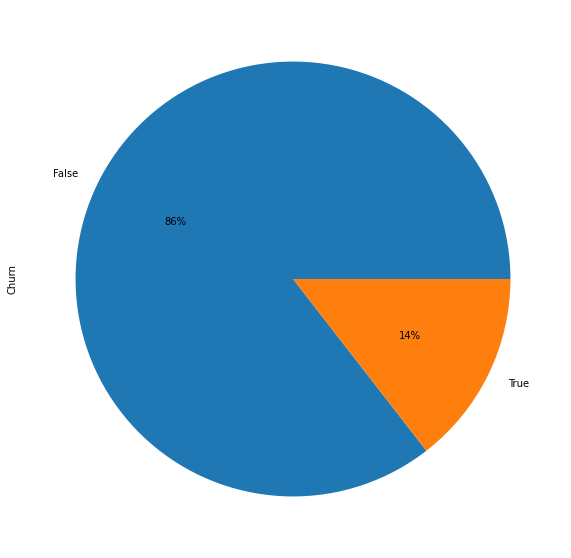

In [ ]:
plot = df.Churn.value_counts().plot.pie(y='Churn', figsize=(10, 10), autopct='%1.0f%%')


Therefore rate of churn of customer are around 14%.

# Summary of data

In [ ]:
# Summary of data
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Here most of the features variables are tends to following normal distribution and some of them are positively skewd normarmal distribution

#Visualisation all varibles

In [ ]:
#Area Code
df['Area code'].unique()

array([415, 408, 510])

In [ ]:
cont_df = df.copy()

In [ ]:
cont_df['Churn'] = cont_df['Churn'].replace({bool(True):1,bool(False):0})
#Replacing Yes/No values with 1 and 0
cont_df['International plan'] = cont_df['International plan'].replace({"Yes":1,"No":0}).astype(int)
cont_df['Voice mail plan'] = cont_df['Voice mail plan'].replace({"Yes":1,"No":0}).astype(int)

In [ ]:
# Define the number of rows and columns you want
n_rows=4
n_cols=5
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20,13))
for i, column in enumerate(cont_df.columns):
    sns.histplot(cont_df[column],ax=axes[i//n_cols,i%n_cols])

Therefore here we can see that most of the variable either approximately normaly or positively skewed distributed. And the remaining variables are categorical. 

In [ ]:
#Dropping Account Length as it doesnt make a sense here
df = df.drop('Account length',axis=1)

#Correlation matrix (heatmap style)

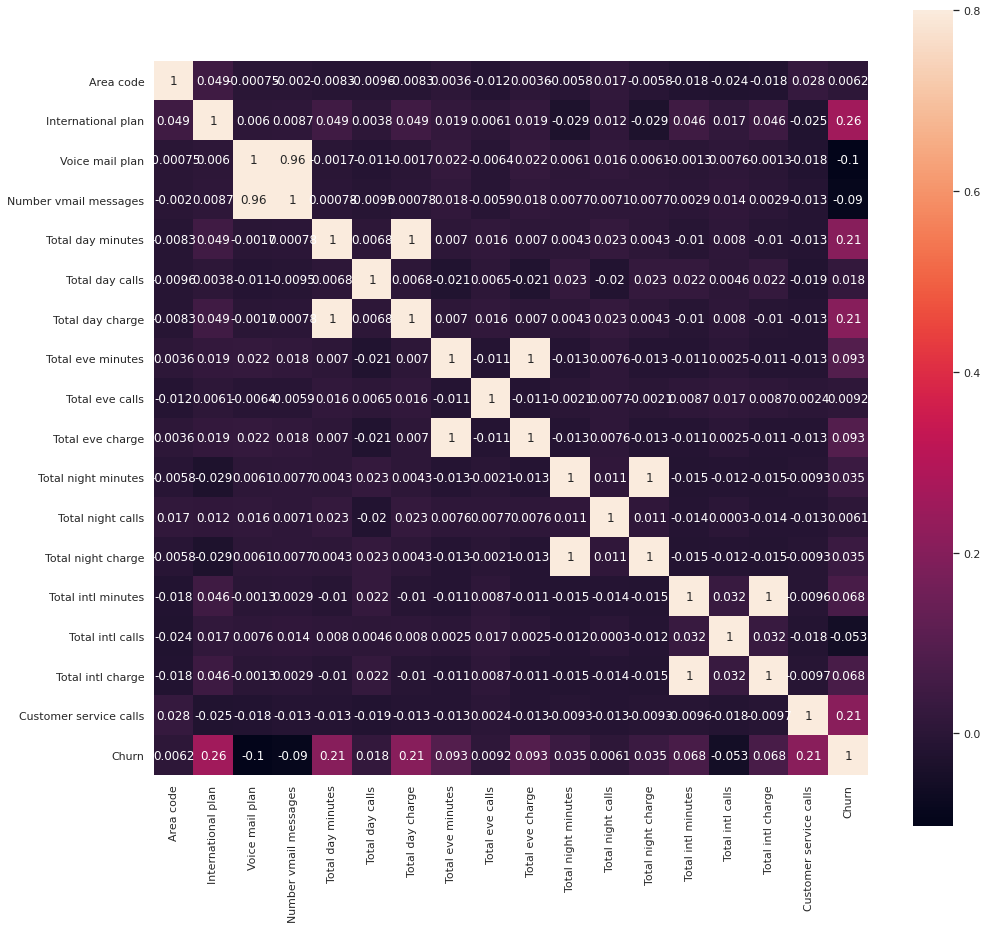

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 15))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

Here we can see that there is a perfect positive correlation between the 4 pair of variable (viz:Total Number of Minutes Spent By Customers and Total Charge to the Customers are perfectly related.) and 1 pair voice mail plan and the number of voice mail.

#Churn due to univariate features variable

#Churn According to States

In [ ]:
# Count the number of churners and non-churners by State
print(df.groupby('State')['Churn'].value_counts())

State  Churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      9
Name: Churn, Length: 102, dtype: int64


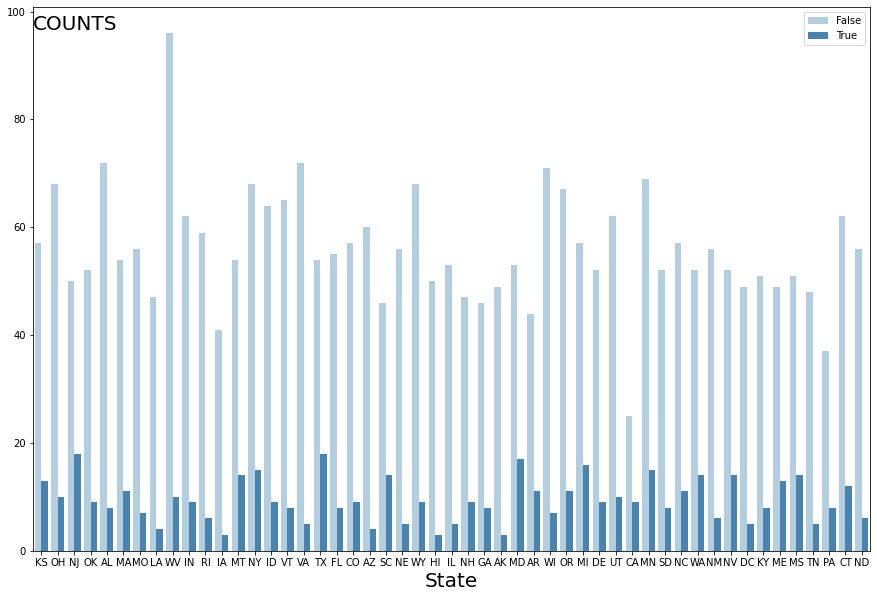

In [ ]:

fig, axe = plt.subplots(figsize=(15,10))

axe = sns.countplot(x='State', hue='Churn', data=df, palette='Blues')


axe.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
axe.set_xlabel('State', size=20)
axe.yaxis.set_label_coords(0.05, 0.95)  # (x, y)
axe.legend(loc=0,fontsize=10);

axe.tick_params(labelsize=10) 

Texas,NJ,CA,MD have the bit more churn rate than usual, A Network Upgradation would be strongly suggested in these areas!.

While California is the most populous state in the U.S, there are not as many customers from California in our dataset. Arizona (AZ), for example, has 64 customers, 4 of whom ended up churning. In comparison, California has a higher number (and percentage) of customers who churned. This is useful information for a company.

In [ ]:
state_df = df[df['State']=='CA']

In [ ]:
state_df['Churn'].value_counts()

False    25
True      9
Name: Churn, dtype: int64

#Churn according to customer service calls

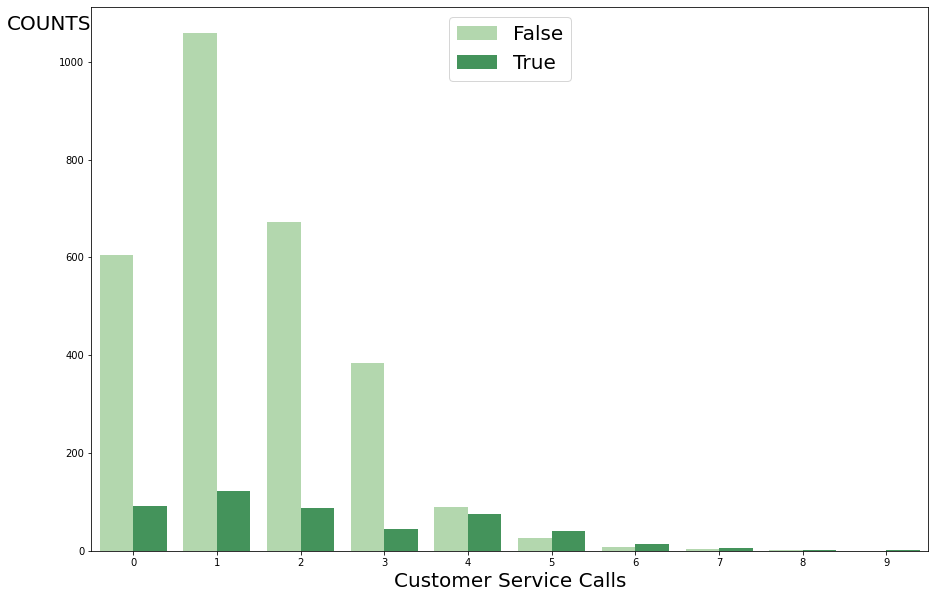

In [ ]:
# Customer Calls
fig, axz = plt.subplots(figsize=(15,10))

axz = sns.countplot(x='Customer service calls', hue='Churn', data=df, palette='Greens')

axz.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
axz.set_xlabel('Customer Service Calls', size=20)
axz.yaxis.set_label_coords(-0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=10)

While some customers are lazy and hence without resolving the issue they have jumped to other network operator,while the customers who have called more than three have very high churn rate indicating their issue was not solved in first attempt.
A Feedback is neccesary in such situations.
It should given a Confirmation to the Customer that there issue would be solved in first attempt


# Churn due to voice mail plan, International plan and area code

In [ ]:
df.groupby('International plan')['Churn'].value_counts()

International plan  Churn
No                  False    2664
                    True      346
Yes                 False     186
                    True      137
Name: Churn, dtype: int64

In [ ]:
df.groupby('Voice mail plan')['Churn'].value_counts()

Voice mail plan  Churn
No               False    2008
                 True      403
Yes              False     842
                 True       80
Name: Churn, dtype: int64

In [ ]:
df.groupby('Area code')['Churn'].value_counts()

Area code  Churn
408        False     716
           True      122
415        False    1419
           True      236
510        False     715
           True      125
Name: Churn, dtype: int64

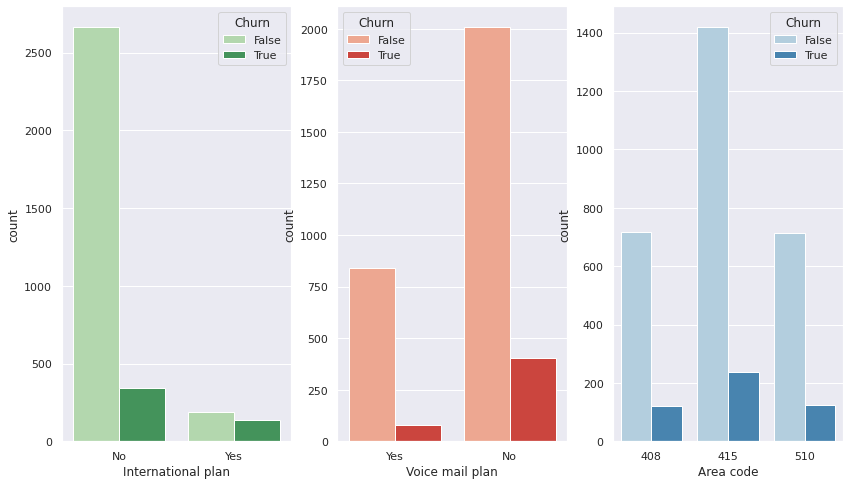

In [ ]:
fig, axs = plt.subplots(ncols=3,figsize=(14,8))

axz = sns.countplot(x='International plan', hue='Churn', data=df, palette='Greens',ax=axs[0])
axz = sns.countplot(x='Voice mail plan', hue='Churn', data=df, palette='Reds',ax=axs[1])
axz = sns.countplot(x='Area code', hue='Churn', data=df, palette='Blues',ax=axs[2])
plt.show()

#Call-minutes affecting the Churn Rate throughout day, evening, night and international 


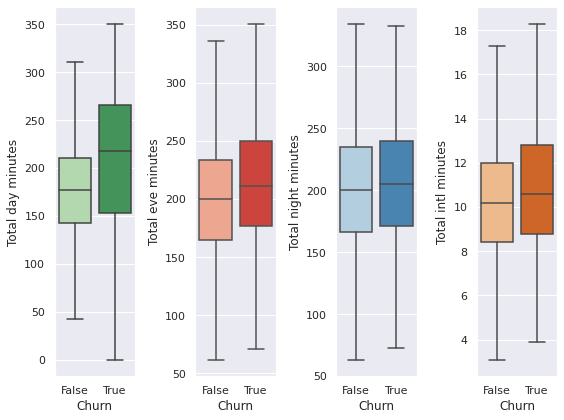

In [ ]:
# this helps organize our plots and keep them in the same figure
fig, axs = plt.subplots(ncols=4,figsize=(8,6))
sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axs[0],sym="",palette='Greens')
sns.boxplot(x='Churn', y='Total eve minutes', data=df, ax=axs[1],sym="",palette='Reds')
sns.boxplot(x='Churn', y='Total night minutes', data=df, ax=axs[2],sym="",palette='Blues')
sns.boxplot(x='Churn', y='Total intl minutes', data=df, ax=axs[3],sym="",palette='Oranges')
# this prevents plots from overlapping
plt.tight_layout()

From above box plot the following interpretation can be made:

**1.** We can infer from above box-plot of Total day minutes that with users spending 225 minutes or more i.e. approx 4hrs tend to switch to other operator.

**2.** it's look like a general trend for all(except for international call) the box plot that customer spending 200 minutes or more have tandency to churn.

**3.**In Night, The Loyal Customers are spend more time is what the box-plot indicates

#Churn due total calls

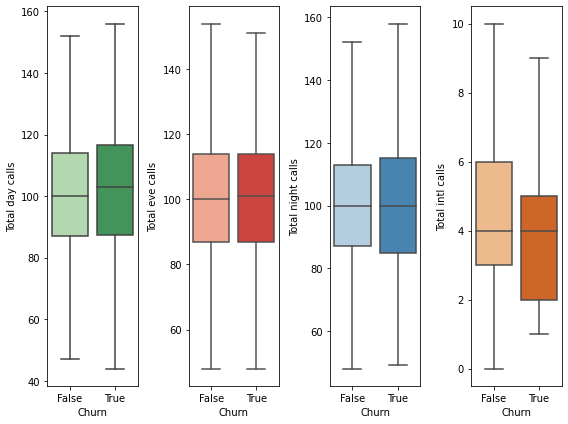

In [ ]:
# this helps organize our plots and keep them in the same figure
fig, axs = plt.subplots(ncols=4,figsize=(8,6))
sns.boxplot(x='Churn', y='Total day calls', data=df, ax=axs[0],sym="",palette='Greens')
sns.boxplot(x='Churn', y='Total eve calls', data=df, ax=axs[1],sym="",palette='Reds')
sns.boxplot(x='Churn', y='Total night calls', data=df, ax=axs[2],sym="",palette='Blues')
sns.boxplot(x='Churn', y='Total intl calls', data=df, ax=axs[3],sym="",palette='Oranges')
# this prevents plots from overlapping
plt.tight_layout()

We can infere here that on an average a 100 calls are made(except international ) which is a good indication for the company.But we can also note that for the churn customer the median is slightly higher than 100 which indicates there are call drops which may lead to more calls in a morning.

From above box plot we can say that it's doesn't have much significant effect. But if we close look at the above box plot we can say that the customer who has international plan and are making less than 3 international call are more vunerable.

In [ ]:
#Churn analysis due to cost

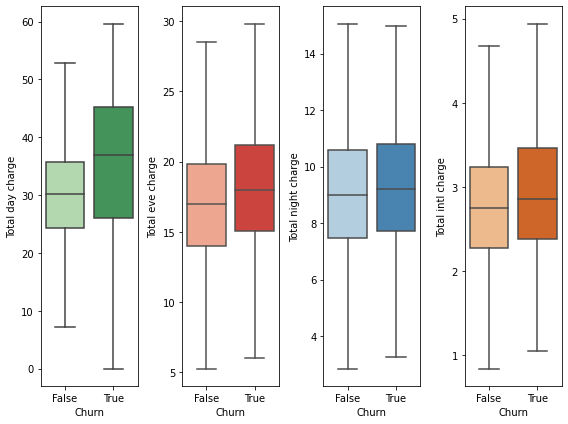

In [ ]:
fig, axs = plt.subplots(ncols=4,figsize=(8,6))
sns.boxplot(x='Churn', y='Total day charge', data=df, ax=axs[0],sym="",palette='Greens')
sns.boxplot(x='Churn', y='Total eve charge', data=df, ax=axs[1],sym="",palette='Reds')
sns.boxplot(x='Churn', y='Total night charge', data=df, ax=axs[2],sym="",palette='Blues')
sns.boxplot(x='Churn', y='Total intl charge', data=df, ax=axs[3],sym="",palette='Oranges')
# this prevents plots from overlapping
plt.tight_layout()

As from above box-plots we can conclude one thing i.e Customers having more minutes spent on the network tend to leave the it's subscription and from the above box-plot it clearly indicates that there is defect in the pricing startegy of the company. We can do the following thing:

1.Startegy of pricing needs to be re-evaluated. 2.The Clients who have high call minutes needs a discount in the end.

#Checking Voice-Mail Feature

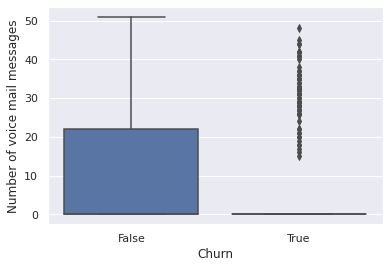

In [ ]:
sns.boxplot(x='Churn',y='Number vmail messages',data=df)
plt.ylabel('Number of voice mail messages')

plt.show()

We can Notice for Voice-Mail Feature when there are more than 20 voice-mail messages then certainly there is a churn indicating improving the voice-mail feature or setting a limit and check whether a customer is retianed.
According to above box plot :

1.Voice-Mail Service Upgradation 2.Setting up a limit on Voice-Mail service strictly no more than 25 voice mails. 3.Quality Drop in Voice-Mail after 25 voice mails.

##Combine effect of features variable on Churn

#To visualize the difference in Customer service calls between churners and non-churners

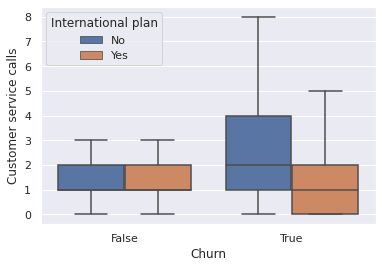

In [ ]:
# Create the box plot
sns.boxplot(x = 'Churn',
            y = 'Customer service calls',
            data = df,
            sym = "",                  
            hue = "International plan") 
# Display the plot
plt.show()

It looks like customers who do churn end up leaving more customer service calls unless these customers also have an international plan, in which case they leave fewer customer service calls. This type of information is really useful in better understanding the drivers of churn.

In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

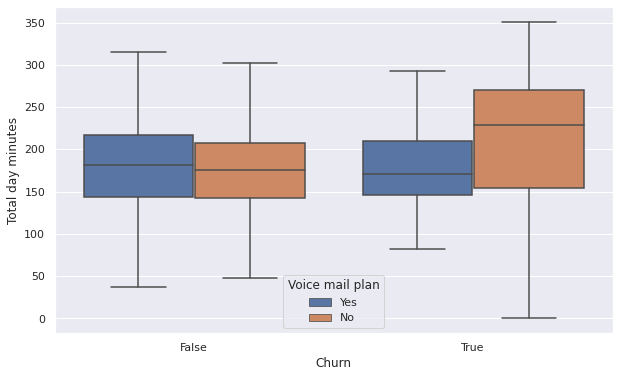

In [ ]:
# Create the box plot
plt.subplots(figsize=(10,6))
sns.boxplot(x = 'Churn',y = 'Total day minutes',data = df,hue = "Voice mail plan",sym="") 
# Display the plot
plt.show()

In [ ]:
print('Maximum number of minutes:',df['Total day minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total day minutes'].max()/60))
print('Minimum number of minutes:',df['Total day minutes'].min())
print('Average number of minutes:',round(df['Total day minutes'].mean(),2),'i.e. Max number of Hours  spent:',round(df['Total day minutes'].mean()/60))

Maximum number of minutes: 350.8 i.e. Max number of Hours  spent: 6
Minimum number of minutes: 0.0
Average number of minutes: 179.78 i.e. Max number of Hours  spent: 3


In [ ]:
print('Maximum number of calls:',df['Total day calls'].max())
print('Minimum number of calls:',df['Total day calls'].min())
print('Average number of calls:',df['Total day calls'].mean())

Maximum number of calls: 165
Minimum number of calls: 0
Average number of calls: 100.43564356435644


#Pairplot

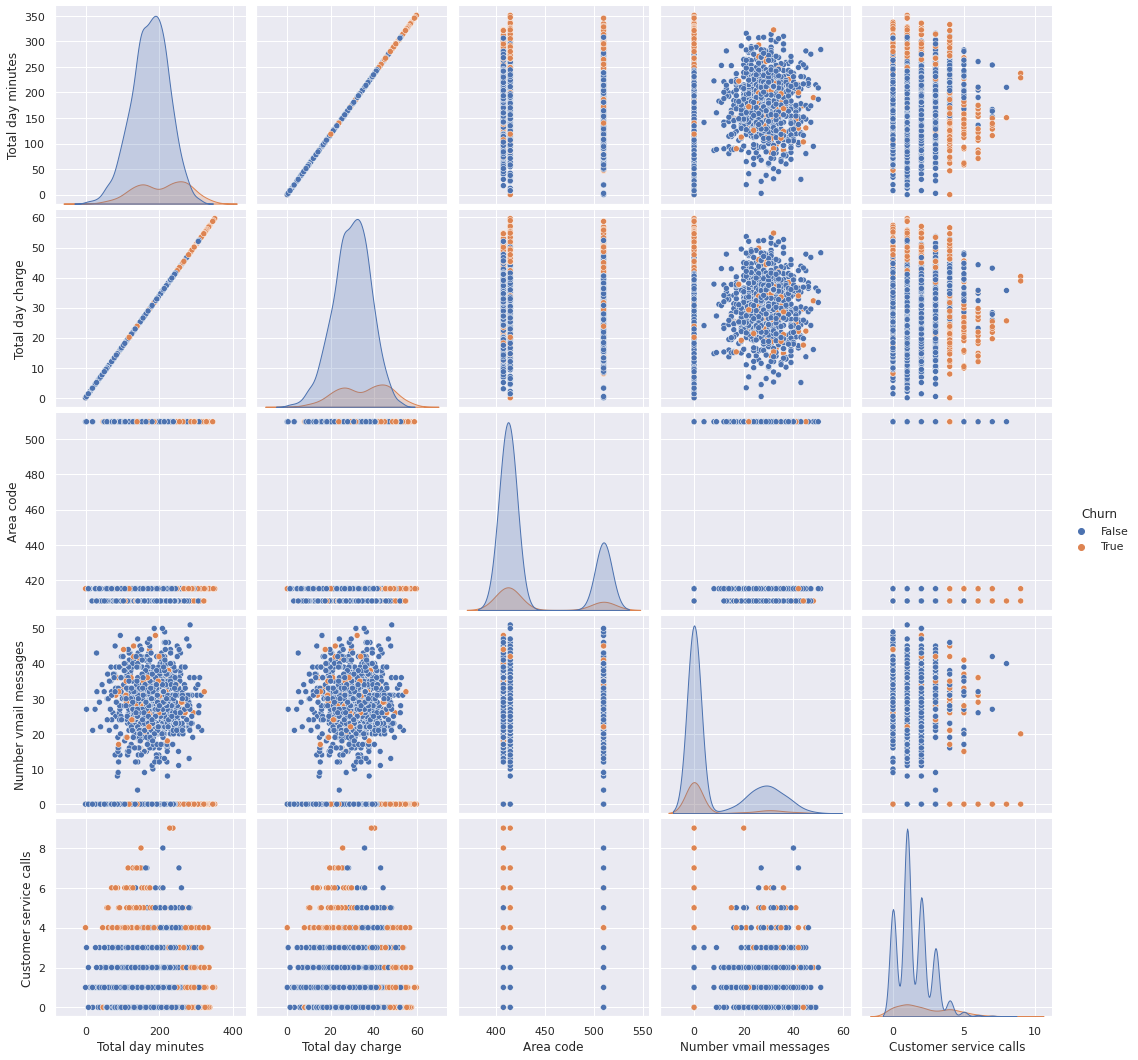

In [ ]:
#scatterplot
sns.set()
cols = ['Churn','Total day minutes','Total day charge','Area code','Number vmail messages','Customer service calls']
sns.pairplot(df[cols], hue="Churn", size = 3)
plt.show();

Interpreting the Pair plot:
the diagonal axis is the histogram for the particular variable with the y-axis measuring the number of occurrences
the bottom left triangle of the plots and the top right triangle capture the same information, except the axis are flipped

The other two charts capture very similar information with a distinctive divide between the orange churn and blue unchurned.

#Interesiting finding


In [ ]:
dataset1 = df[df['Total day minutes']>=250]

In [ ]:
dataset2= df[df['Customer service calls']>=4]

In [ ]:
dataset2.shape,dataset1.shape

((267, 20), (328, 20))

In [ ]:
dataset=dataset1.append(dataset2)

In [ ]:
dataset.shape

(595, 20)

In [ ]:
dataset['Churn'].value_counts()

False    303
True     292
Name: Churn, dtype: int64

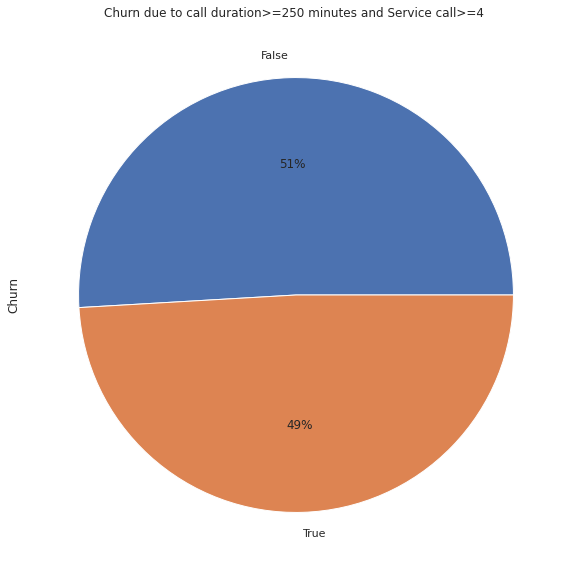

In [ ]:
plot = dataset.Churn.value_counts().plot.pie(y='Churn', figsize=(10, 10), autopct='%1.0f%%')
plt.title('Churn due to call duration>=250 minutes and Service call>=4 ')
plt.show()

Therefore, Here we can see that after making another data frame which consist of total call duration during day greater than equal to 250 and more than 4 customer service call made by cutomer then it's giving us a almost 49% churn and 51% non-churn customers, whch is very significant. Also the above dataframe consist of overall 595 obsevation and having more than 60% churn customer compare to origional data.

In [ ]:
charg1=df[df['Total day charge']>=42]

In [ ]:
charg2 = df[df['Customer service calls']>=4]

In [ ]:
charge = charg1.append(charg2)

In [ ]:
charge['Churn'].value_counts()

False    317
True     303
Name: Churn, dtype: int64

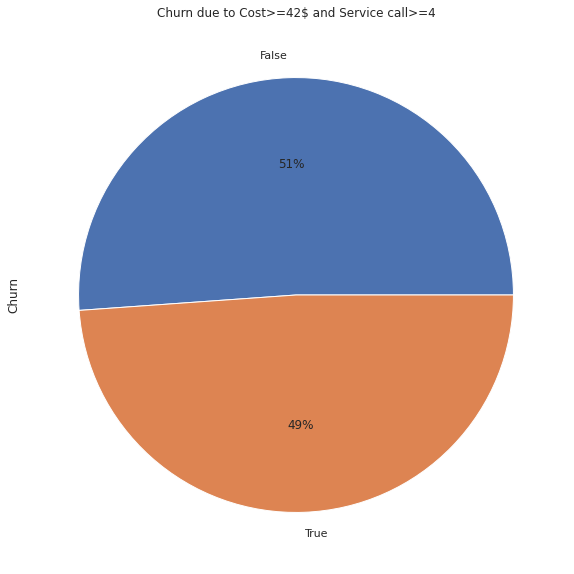

In [ ]:
plot = charge.Churn.value_counts().plot.pie(y='Churn', figsize=(10, 10), autopct='%1.0f%%')
plt.title('Churn due to Cost>=42$ and Service call>=4' )
plt.show()

Therefore, Here we can see that after making another data frame which consist of total cost charge by company for call duration during day greater than equal to 42$ and more than 4 customer service call made by cutomer then it's giving us a almost 49% churn and 51% non-churn customers, whch is very significant. Also the above dataframe consist of overall 620 obsevation and having more than 62% churn customer compare to origional data.